<h1><font color="#113D68" size=5>TINTOlib: Converting Tidy Data into Image for Classification with 2-Dimensional Convolutional Neural Networks</font></h1>



<h1><font color="#113D68" size=6>How to read TINTO images</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>
<font color="#113D68" size=3>Luis Orozco-Barbosa</font><br>
<font color="#113D68" size=3>Jiayun Liu</font><br>
</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section12)
    * [1.2. Citation](#section12)
* [2. Libraries](#section2)
* [3. Data processing](#section3)
    * [3.1. Read images](#section31)
    * [3.2. Data Curation](#section32)
* [4. Pre-modelling phase](#section4)
    * [4.1. Resize images](#section41)
    * [4.2. Iteradores](#section42)
* [5. Modelling with CNN](#section5)
    * [5.1. CNN](#section51)
    * [5.2. Compile and fit](#section52)
    * [5.3. Results](#section53)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This is a tutorial on how to read the images created by TINTO and pass them to a very simple Hybrid Neural Network (HyNN). The images must already be created by the TINTO software. See the documentation in GITHUB for how to create the images from tabular data.

Remember that when using CNN you can set the training to be done with GPUs to improve performance.

<figure><center>
  <img src="../../Images/HyNN.png" width="750" height="400" alt="Gráfica">
  <figcaption><blockquote>CNN architecture with synthetic images. Extract from <a href="https://doi.org/10.1016/j.inffus.2022.10.011">A novel deep learning approach using blurring image techniques for Bluetooth-based indoor localisation</a></blockquote></figcaption>
</center></figure>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [Information Fusion Journal](https://doi.org/10.1016/j.inffus.2022.10.011)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [SoftwareX](https://doi.org/10.1016/j.softx.2023.101391)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTO in [GitHub](https://github.com/oeg-upm/TINTO)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using Convolutional Neural Networks (CNNs). TINTO offers the opportunity to convert tidy data into images through the representation of characteristic pixels by implementing two dimensional reduction algorithms: PCA and _t_-SNE. Our proposal also includes a blurring technique, which adds more ordered information to the image and can improve the classification task in CNNs.

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data must be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTO does not accept data in string or any other non-numeric format.
- Two dimensionality reduction algorithms are used in image creation, **[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)** and **[*t*-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)** from the Scikit-learn Python library.
- The synthetic images to be created will be in black and white, i.e. in 1 channel.
- The synthetic image **dimensions** can be set as a parameter when creating them.
- The synthetic images can be created using **characteristic pixels** or **blurring** painting technique (expressing an overlap of pixels as the **maximum** or **average**).
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

The first thing we need to do is to declare the libraries

In [1]:
import os
import pandas as pd
import random
import numpy as np

import matplotlib.pyplot as plt

import sklearn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax
from tensorflow.keras import layers, models, Model
from tensorflow.keras.layers import Input, Activation,MaxPooling2D, concatenate

#Models of TINTOlib
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination
from TINTOlib.featureWrap import FeatureWrap
from TINTOlib.bie import BIE

SEED = 64
# SET RANDOM SEED FOR REPRODUCIBILITY
#torch.manual_seed(SEED)
#torch.cuda.manual_seed(SEED)
#torch.cuda.manual_seed_all(SEED)
#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

TINTOlib creates a folder structure to store images corresponding to each target in a problem. For classification problems, images are stored in a subfolder with the name of the respective target variable value. Additionally, a CSV file is generated containing:

- The file paths of all images.
- The target value for each image, which corresponds to a sample from the original dataset.

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Read the dataset</font>

In this part, we proceed to read the dataset.

In [2]:
dataset_name = 'iris'

#Read CSV
df = pd.read_csv(f"../Dataset/Multiclass/{dataset_name}.csv")
df.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


In [3]:
df.shape

(150, 5)

To determine the appropriate size for a square image that contains all the feature pixels, you need to calculate the square root of the total number of features. The resulting value can be used for the methods that requires inserting the image size.

In [4]:
# Get the shape of the dataframe
num_columns = df.shape[1]

# Calculate number of columns - 1
columns_minus_one = num_columns - 1

# Calculate the square root for image size
import math
image_size = math.ceil(math.sqrt(columns_minus_one))
print(image_size)

2


We delve into label encoding, a crucial preprocessing step for preparing categorical labels for use in machine learning models. Specifically for Multiclass classification tasks, label encoding involves transforming categorical labels into a numerical format.

---
<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Create images with TINTOlib</font>

We prepare the declaration of the classes with the TINTOlib method we want to transform. Note that TINTOlib has several methods and we will have to choose one of them since each method generates different images.

In addition, we establish the paths where the dataset is located and also the folder where the images will be created.

In [5]:
#Select the model and the parameters
problem_type = "supervised"
#problem_type = "regression"

# Transformation methods
image_model = TINTO(problem=problem_type, blur=True, option='maximum', pixels=20, random_seed=SEED)
name = f"TINTO_blur_maximum"
# image_model = REFINED(problem=problem_type, random_seed=SEED, zoom=1, n_processors=8)
# name = f"REFINED"
# image_model = IGTD(problem=problem_type, scale=[image_size,image_size], fea_dist_method='Euclidean', image_dist_method='Euclidean', error='abs', max_step=30000, val_step=300, random_seed=SEED)
# name = f"IGTD_fEuclidean_iEuclidean_abs"
# image_model = BarGraph(problem=problem_type, zoom=2)
# name = f"BarGraph_zoom2"
# image_model = DistanceMatrix(problem=problem_type, zoom=2)
# name = f"DistanceMatrix_zoom2"
# image_model = Combination(problem=problem_type, zoom=2)
# name = f"Combination_zoom2"
# image_model = SuperTML(problem=problem_type, pixels=pixel, font_size=30, feature_importance=True, random_seed=SEED)
# name = f"SuperTML-VF_FS30"
# image_model = FeatureWrap(problem = problem_type, bins=10)
# name = f"FeatureWrap_bins10"
# image_model = BIE(problem = problem_type)
# name = f"BIE"

#Define the dataset path and the folder where the images will be saved
results_folder = f"Results/Multiclass/CNN+MLP_Fusion/{dataset_name}_{name}"
images_folder = f"Synthetic_images/Multiclass/images_{dataset_name}_{name}"

---
<a id="section33"></a>
# <font color="#004D7F" size=5> 3.3. Generate images</font>

In this section, we generate images from the dataset using three key functions of the image generation model:

- fit: Trains the image generation model without generating images. This function is used exclusively for training purposes.
- fit_transform: Trains the image generation model and simultaneously generates images for the dataset. This function is applied to the training dataset, where the model is both trained and used to create images.
- transform: Generates images using the pre-trained model. After training on the training dataset, this function is used to generate images for unseen data, such as validation and test datasets.

Each row in the dataset is transformed into a unique image, ensuring that the number of generated images matches the number of rows in the dataset. The resulting datasets include paths to these images, which are then combined with the original data for further processing.

Split the data into training, validation, and test sets:

In [6]:
import cv2
from sklearn.preprocessing import MinMaxScaler

X_train, X_val = train_test_split(df, test_size=0.20, random_state=SEED)
X_val, X_test = train_test_split(X_val, test_size=0.50, random_state=SEED)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

Define a function to streamline the repetitive process of generating images, updating paths, and combining datasets:

In [7]:
def process_dataset(X, folder_name, generate_function, problem_type):
    """
    Handles dataset processing, including image generation, path updates, 
    and combining the dataset with image paths.

    Parameters:
    ----------
    X : DataFrame
        The dataset to process (training, validation, or test).
    
    folder_name : str
        The name of the folder where generated images will be stored 
        (e.g., 'train', 'val', 'test').
    
    generate_function : function
        The function used for training and generating images. It can be one of the following:
        - `fit`: Trains the model without generating images.
        - `fit_transform`: Trains the model and generates images for the dataset (used for training).
        - `transform`: Uses the pre-trained model to generate images for validation and testing.
    
    problem_type : str
        The type of problem being addressed (e.g., regression, supervised).
        This is used to locate the corresponding `.csv` file containing image paths.

    Returns:
    --------
    X_processed : DataFrame
        The dataset with updated image paths and raw tabular data, ready for further processing.
    
    y_processed : Series
        The labels corresponding to the dataset (target values).
    """
    # Generate the images if the folder does not exist
    folder_path = f"{images_folder}/{folder_name}"
    if not os.path.exists(folder_path):
        generate_function(X, folder_path)
    else:
        print(f"The images for {folder_name} are already generated")

    # Load image paths
    img_paths = os.path.join(folder_path, f"{problem_type}.csv")
    imgs = pd.read_csv(img_paths)

    # Update image paths
    imgs["images"] = folder_path + "/" + imgs["images"]

    # Combine datasets
    combined_dataset = pd.concat([imgs, X], axis=1)

    # Split data and labels
    X_processed = combined_dataset.drop(df.columns[-1], axis=1).drop("class", axis=1)
    y_processed = combined_dataset["class"]

    return X_processed, y_processed


In [8]:
### X_train
X_train, y_train = process_dataset(X_train, "train", image_model.fit_transform, problem_type)

In [9]:
### X_val
X_val, y_val = process_dataset(X_val, "val", image_model.transform, problem_type)

In [10]:
### X_test
X_test, y_test = process_dataset(X_test, "test", image_model.transform, problem_type)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

---
<a id="section41"></a>
# <font color="#004D7F" size=5> 4.1. Data curation</font>

Note that each method generates images of **different pixel size**. For example:
- `TINTO` method has a parameter that you can specify the size in pixels which by default is 20.
- Other parameters such as `Combined` generates the size automatically and you must obtain them from the _shape_ of the images.

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in [PyPI](https://tintolib.readthedocs.io/en/latest/installation.html)

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
💡 **Important!!!**:  Keep in mind that, depending on the method used, you need to identify the number of pixels in the image. For example, in TINTO it is specified as a parameter, but in IGTD it is done afterwards, once the image is created (and even the pixels of width and height can be different).

In [11]:
#TIDY DATA SPLITTED
X_train_num = X_train.drop("images",axis=1)
X_val_num = X_val.drop("images",axis=1)
X_test_num = X_test.drop("images",axis=1)

#IMAGES
# For 3 channels (RGB)
X_train_img = np.array([cv2.imread(img) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img) for img in X_test["images"]])

# For 1 channels (GRAY SCALE)
"""X_train_img = np.array([cv2.imread(img,cv2.IMREAD_GRAYSCALE) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img,cv2.IMREAD_GRAYSCALE) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img,cv2.IMREAD_GRAYSCALE) for img in X_test["images"]])"""

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale numerical data
X_train_num = scaler.fit_transform(X_train_num)
X_val_num = scaler.transform(X_val_num)
X_test_num = scaler.transform(X_test_num)

attributes = X_train_num.shape[1]
height, width, channels = X_train_img[0].shape
imgs_shape = (height, width, channels)

print("Images shape: ",imgs_shape)
print("Attributres: ",attributes)
pixel=X_train_img[0].shape[0]
print("Image size (pixels):", pixel)

Images shape:  (20, 20, 3)
Attributres:  4
Image size (pixels): 20


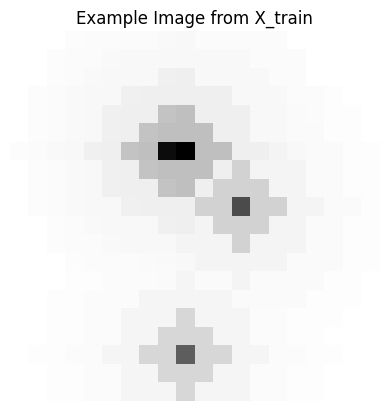

In [12]:
# Plot an example image (e.g., the first image in the array)
example_image = X_train_img[0]

# Convert the image from BGR (OpenCV default) to RGB for correct color display
example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(example_image_rgb)
plt.title("Example Image from X_train")
plt.axis('off')  # Hide the axis for a cleaner look
plt.show()

<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Data Analysis</font>

In [13]:
# Select all the attributes to normalize
columns_to_normalize = df.columns[:-1]


# Normalize between 0 and 1
df_normalized = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

# Combine the attributes and the label
df_normalized = pd.concat([df_normalized, df[df.columns[-1]]], axis=1)

df_normalized.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1


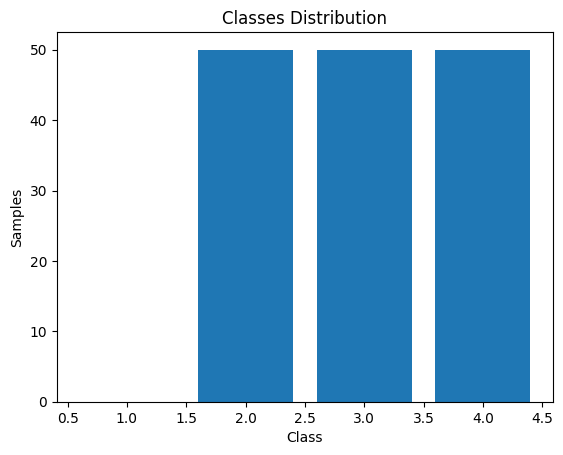

In [14]:
target_values = df_normalized.iloc[:,-1]
class_counts = np.bincount(target_values)
class_labels = np.arange(1, len(class_counts) + 1)

# Create the bar plot
plt.bar(class_labels, class_counts)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('Samples')
plt.title('Classes Distribution')

# Display the plot
plt.show()

In [15]:
#ONE HOT ENCODING FOR MULTICLASS PROBLEMS
from tensorflow.keras.utils import to_categorical

n_class = y_train.nunique()

# Adjusting class indices to start from 0 since to_categorical expects classes indexed from 0 to n_class-1,
# while original indices range from 1 to n_class.
y_train =  to_categorical(y_train-1,n_class)
y_val = to_categorical(y_val-1,n_class)
y_test = to_categorical(y_test-1,n_class)

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modeling hybrid network</font>

In [16]:
dropout = 0.3

In [17]:
ff_inputs = Input(shape = (attributes,))

# * START BRANCH 1

mlp_1 = Dense(256, activation='relu')(ff_inputs)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(128, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(64, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(32, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(16, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

ff_model = Model(inputs = ff_inputs, outputs = mlp_1)

In [18]:
input_shape = Input(shape=imgs_shape)
# CNN branch 1
tower_1 = Conv2D(16, (3,3), activation='relu',padding="same")(input_shape)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)

tower_1 = Conv2D(32, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = Activation('relu')(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = Activation('relu')(tower_1)

#Flatten
merged = Flatten()(tower_1)

#Dense layers
out = Dense(128, activation='relu')(merged)
out = Dense(64, activation='relu')(out)
out = Dense(32, activation='relu')(out)

cnn_model = Model(input_shape, out)

---
<a id="section51"></a>
# <font color="#004D7F" size=5> 5.1. Concatenate branches</font>

Finally, we need to fuse the CNN and MLP branches. In this case, we use a direct concatenation of the output from the CNN branch with the output from the MLP branch, feeding them into a final fully connected neural network (FFNN) that will produce the predictions.

In [19]:
combinedInput = concatenate([ff_model.output, cnn_model.output])
x = Dense(32, activation="relu")(combinedInput)
#x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(n_class, activation="softmax")(x)
model = Model(inputs=[ff_model.input, cnn_model.input], outputs=x)

In [20]:
METRICS = [
    #tf.keras.metrics.TruePositives(name = 'tp'),
    #tf.keras.metrics.FalsePositives(name = 'fp'),
    #tf.keras.metrics.TrueNegatives(name = 'tn'),
    #tf.keras.metrics.FalseNegatives(name = 'fn'), 
    tf.keras.metrics.CategoricalAccuracy(name ='accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall'),
    tf.keras.metrics.AUC(name = 'auc'),
]

In [21]:
#HYPERPARAMETERS
opt = Adam(learning_rate=1e-3)
model.compile(
    loss="categorical_crossentropy", 
    optimizer=opt,
    metrics = METRICS
)
epochs = 500

In [22]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode="max" ,restore_best_weights=True)

In [23]:
model_history=model.fit(
    x=[X_train_num, X_train_img/255], y=y_train,
    validation_data=([X_val_num, X_val_img/255], y_val),
    epochs=epochs , 
    batch_size=8,
    #steps_per_epoch = X_train_num.shape[0]//batch_size,
    #validation_steps = X_train_num.shape[0]//batch_size,
    #callbacks=[early_stopping]
)

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3605 - auc: 0.4634 - loss: 1.3095 - precision: 0.3458 - recall: 0.1811 - val_accuracy: 0.3333 - val_auc: 0.5133 - val_loss: 1.1486 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4004 - auc: 0.5805 - loss: 1.1463 - precision: 0.3542 - recall: 0.1573 - val_accuracy: 0.3333 - val_auc: 0.3878 - val_loss: 1.1212 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3504 - auc: 0.5981 - loss: 1.0824 - precision: 0.4276 - recall: 0.2075 - val_accuracy: 0.3333 - val_auc: 0.5089 - val_loss: 1.1405 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4079 - auc: 0.6013 - loss: 1.1007 - precision: 0.4945 - recall: 0.2172 - val_accuracy: 0.2667 - val_auc: 0.4844 - val_loss: 1.1281 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epo

In [24]:
print(model_history.history.keys())

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall'])


<a id="section6"></a>
# <font color="#004D7F" size=6> 6. Results</font>

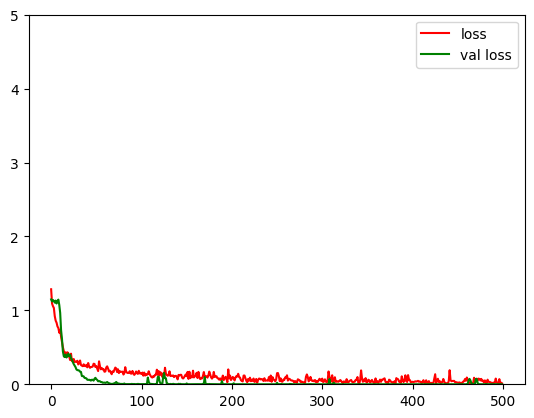

In [25]:
#print(model_history.history['loss'])
plt.plot(model_history.history['loss'], color = 'red', label = 'loss')
plt.plot(model_history.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
plt.ylim(0,5)
plt.show()

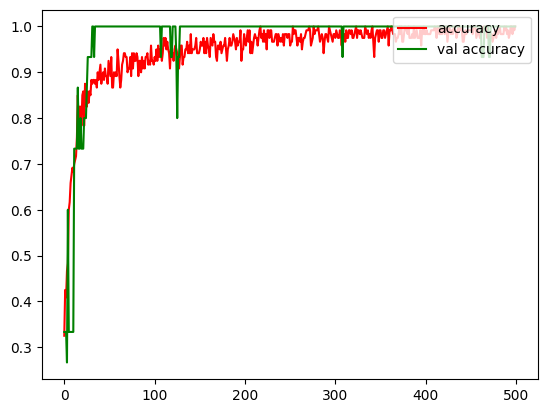

In [26]:
plt.plot(model_history.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], color = 'green', label = 'val accuracy')
plt.legend(loc = 'upper right')
plt.show()

In [27]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [28]:
prediction = model.predict([X_test_num,X_test_img/255],)
real_values= np.argmax(y_test, axis=1)
predicted_classes = np.argmax(prediction, axis = 1)

result = [list(t) for t in zip(predicted_classes, real_values)]
#print(np.round(prediction))
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
[[np.int64(2), np.int64(2)], [np.int64(2), np.int64(2)], [np.int64(0), np.int64(0)], [np.int64(1), np.int64(1)], [np.int64(2), np.int64(2)], [np.int64(0), np.int64(0)], [np.int64(2), np.int64(1)], [np.int64(1), np.int64(1)], [np.int64(1), np.int64(1)], [np.int64(0), np.int64(0)], [np.int64(0), np.int64(0)], [np.int64(2), np.int64(2)], [np.int64(2), np.int64(2)], [np.int64(2), np.int64(2)], [np.int64(1), np.int64(1)]]


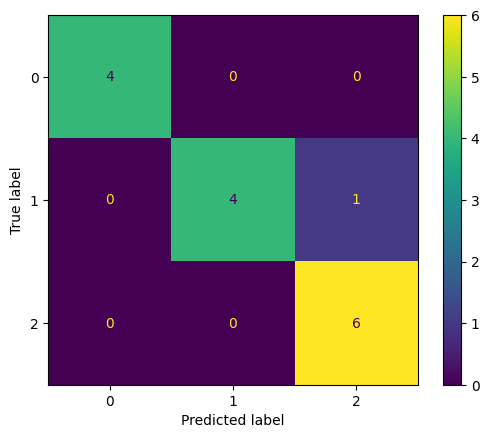

In [29]:
from sklearn.metrics import confusion_matrix
true_classes = real_values

cm = confusion_matrix(true_classes, predicted_classes)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()




In [30]:
report = sklearn.metrics.classification_report(true_classes, 
                                               predicted_classes)
print(report) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89         5
           2       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.95      0.93      0.94        15
weighted avg       0.94      0.93      0.93        15



In [31]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score, recall_score

test_accuracy = accuracy_score(true_classes, predicted_classes)
#test_auc = roc_auc_score(true_classes, predicted_classes)
#test_precision = precision_score(true_classes, predicted_classes)
#test_recall = recall_score(true_classes, predicted_classes)

print("Test accuracy:",test_accuracy)
#print("Test AUC:",test_auc)
#print("Test precision:",test_precision)
#print("Test recall:",test_recall)

Test accuracy: 0.9333333333333333


In [32]:
train_accuracy = model_history.history["accuracy"][-1]
train_auc = model_history.history["auc"][-1]
train_precision = model_history.history["precision"][-1]
train_recall = model_history.history["recall"][-1]
train_loss = model_history.history["loss"][-1]

print("Train accuracy:",train_accuracy)
print("Train AUC:",train_auc)
print("Train precision:",train_precision)
print("Train recall:",train_recall)
print("Train loss:",train_loss)

Train accuracy: 1.0
Train AUC: 1.0
Train precision: 1.0
Train recall: 1.0
Train loss: 0.012732942588627338


In [33]:
validation_accuracy = model_history.history["val_accuracy"][-1]
validation_auc = model_history.history["val_auc"][-1]
validation_precision = model_history.history["val_precision"][-1]
validation_recall = model_history.history["val_recall"][-1]
validation_loss = model_history.history["val_loss"][-1]

print("Validation accuracy:",validation_accuracy)
print("Validation AUC:",validation_auc)
print("Validation precision:",validation_precision)
print("Validation recall:",validation_recall)
print("Validation loss:",validation_loss)

Validation accuracy: 1.0
Validation AUC: 1.0
Validation precision: 1.0
Validation recall: 1.0
Validation loss: 0.00032730598468333483
